<a href="https://colab.research.google.com/github/vishnu772/Simple-Image-Classification/blob/master/CNN_sample_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

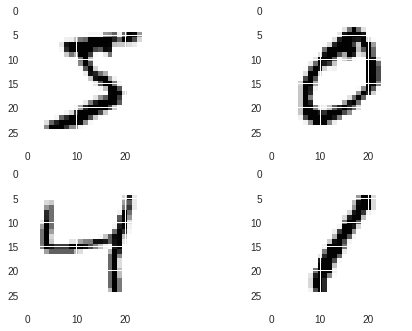

In [0]:
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])



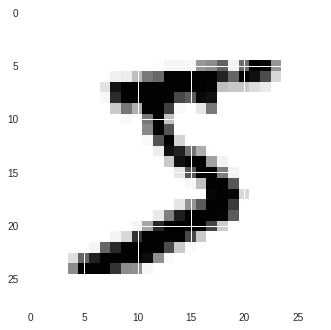

In [0]:
x_t=x_train/255

plt.imshow(x_t[0])

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28,1).astype('float32')

In [0]:
x_train.shape



(60000, 28, 28, 1)

In [0]:
# we normalize them for better prediction
x_train=x_train/255
x_test=x_test/255

In [0]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:


model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,verbose=1,validation_split=0.2,batch_size=200)



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 40s 830us/step - loss: 0.2734 - acc: 0.9219 - val_loss: 0.0946 - val_acc: 0.9721
Epoch 2/10
48000/48000 [==============================] - 39s 820us/step - loss: 0.0827 - acc: 0.9758 - val_loss: 0.0679 - val_acc: 0.9813
Epoch 3/10
48000/48000 [==============================] - 39s 815us/step - loss: 0.0594 - acc: 0.9816 - val_loss: 0.0562 - val_acc: 0.9829
Epoch 4/10
48000/48000 [==============================] - 39s 818us/step - loss: 0.0467 - acc: 0.9856 - val_loss: 0.0499 - val_acc: 0.9853
Epoch 5/10
48000/48000 [==============================] - 39s 817us/step - loss: 0.0386 - acc: 0.9881 - val_loss: 0.0446 - val_acc: 0.9863
Epoch 6/10
48000/48000 [==============================] - 39s 814us/step - loss: 0.0312 - acc: 0.9897 - val_loss: 0.0449 - val_acc: 0.9863
Epoch 7/10
48000/48000 [==============================] - 39s 811us/step - loss: 0.0266 - acc: 0.9915 - val_loss: 0.

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 4s 382us/step
[0.035557686447663585, 0.9885]
Large CNN Error: 1.15%
